In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_digits

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

# PARTE I
Variando el k entre 1 y 15, ejecutar el algoritmo y obtener su tasa de aciertos para el conjunto de test. Representar este valor en un diagrama de barras, calcular el k óptimo y dar su correspondiente tasa de aciertos.


In [3]:
digitos = load_digits()
len(digitos.feature_names)

64

<div class="alert alert-block alert-success">
<b>El primer fragmento de código:</b> crea el DataFrame "df" con columnas que se nombran a partir de los nombres de características del conjunto de datos de "digitos" (obtenido a través de "digitos.feature_names") y los datos del conjunto de datos de "digitos" (obtenido a través de "digitos.data").

<b>El segundo fragmento de código: </b> añade una nueva columna al DataFrame "df" llamada "digito", que contiene los objetivos del conjunto de datos de "digitos" (obtenido a través de "digitos.target"). "loc" se refiere a la ubicación donde se inserta la nueva columna, que es después de la última columna existente en el DataFrame, y "value" es el valor que se asigna a la nueva columna.</div>

In [4]:
df = pd.DataFrame(columns=digitos.feature_names, data=digitos.data)

df.insert(loc=len(digitos.feature_names), column='digito', value=digitos.target) #Añade la columna digito que es donde aparece el objetivo
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digito
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


<div class="alert alert-block alert-success">
<b>El primer fragmento de código:</b>  crea un objeto "escala" de la clase "MinMaxScaler".

<b>El segundo fragmento de código:</b>  utiliza el método "fit_transform" del objeto "escala" para escalar los datos del conjunto de datos "digitos" y almacenarlos en la variable "X". "fit_transform" primero ajusta el escalado en función de los datos del conjunto de datos y luego transforma los datos en su versión escalada.

<b>El tercer fragmento de código:</b>  almacena los objetivos del conjunto de datos "digitos" en la variable "y".
</div>




In [5]:
#Hay que hacer la escala con la union de todos los conjuntos, aunque te los den separados. El fit lo puedes hacer sobre cada conjunto separado.
escala = MinMaxScaler()
X = escala.fit_transform(digitos.data)
y = digitos.target

<div class="alert alert-block alert-success">
    
<b>En el siguiente fragmento de código:</b> La variable "accuracy" es una matriz NumPy de 10 filas y 15 columnas, inicializada con ceros, que se utiliza para almacenar la precisión del clasificador para cada valor de "k" en cada iteración del hold-out repetido.

En el bucle externo "for" de rango 10, se realiza la validación cruzada de "hold-out repetido". En cada iteración, se utiliza el método "train_test_split" de la librería "scikit-learn" para dividir los datos escalados "X" y objetivos "y" en conjuntos de entrenamiento y prueba con un tamaño de prueba del 33% y estratificación de los datos de acuerdo con los objetivos.

Luego, se realiza el bucle interno "for" para recorrer los diferentes valores de "k" del clasificador k-NN.

Dentro de este bucle, se crea un objeto "clf" de la clase "KNeighborsClassifier" con el hiperparámetro "n_neighbors" establecido en "k" y el algoritmo "brute".

A continuación, se ajusta el clasificador utilizando los datos de entrenamiento "X_train" y objetivos "y_train" utilizando el método "fit".

Finalmente, se calcula la precisión del clasificador utilizando el método "score" con los datos de prueba "X_test" y objetivos "y_test", y se almacena en la matriz "accuracy" correspondiente a la iteración actual del hold-out repetido y el valor de "k".
    </div>

In [6]:
accuracy = np.zeros((10,15), dtype=float)
#Hold out repetido
for h in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3 , stratify=y) #(evitamos inicializar random_state para el hold out repetido)
    for k in range(1,16):
        clf = KNeighborsClassifier(n_neighbors = k , algorithm='brute')
        clf.fit(X_train, y_train)
        accuracy[h, k-1]=clf.score(X_test,y_test)

<div class="alert alert-block alert-success">
<b>En el siguiente fragmento de código:</b>  La función "np.mean" de NumPy se utiliza para calcular el promedio de las tasas de precisión almacenadas en la matriz "accuracy" a lo largo del eje 0 (filas), es decir, para cada valor de "k".

El resultado es un vector NumPy de 15 elementos, donde cada elemento es el promedio de la tasa de precisión del clasificador k-NN correspondiente al valor de "k" correspondiente. El vector resultante se almacena en la variable "aciertos".</div>

In [7]:
aciertos = np.mean(accuracy, axis=0)
aciertos.shape

(15,)

<div class="alert alert-block alert-success">
<b>En el siguiente fragmento de código:</b> Se utiliza la función "subplots" de la librería "matplotlib" para crear una figura y un objeto de eje.
La función "ax.bar" se utiliza para crear el gráfico de barras. Se especifica el eje x utilizando la función "np.arange" de NumPy para generar una secuencia de valores enteros del 1 al 15 (correspondiente a los valores de "k"), y se utiliza el vector "aciertos" como altura de las barras.</div>

Text(0, 0.5, 'Aciertos')

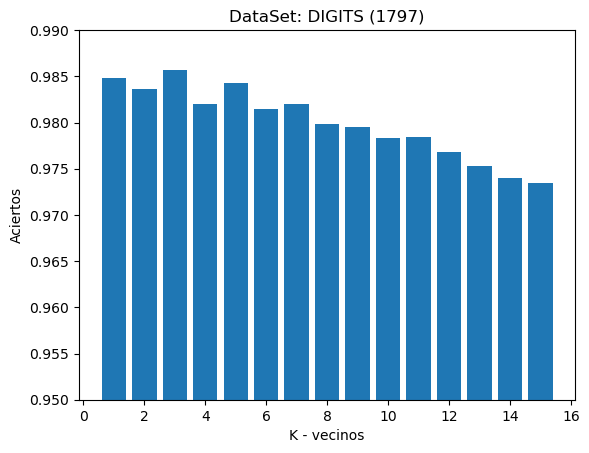

In [8]:
fig, ax =plt.subplots()
ax.bar(x=np.arange(1, 16), height=aciertos)
ax.set_title('DataSet: DIGITS (1797)')
ax.set_ylim(0.95,0.99)
ax.set_xlabel('K - vecinos')
ax.set_ylabel('Aciertos')

In [9]:
print('Kmax  = ', np.argmax(aciertos)+1, '\tTasa max = ',np.max(aciertos))

Kmax  =  3 	Tasa max =  0.9856427378964943


# PARTE II
Lo mismo que lo anterior, sólo que los píxeles hay que reducirlos a bits, esto es, poner uno si el pixel no era cero y dejar el cero, si ya lo era.

<div class="alert alert-block alert-success">
<b>El siguiente fragmento de código:</b> crea una nueva matriz llamada "digBool" a partir de la matriz "digitos.data". La nueva matriz tiene la misma forma que la matriz original, pero con valores booleanos en lugar de valores numéricos.

En particular, para cada elemento en "digitos.data", si su valor es cero, el valor correspondiente en "digBool" será "False", de lo contrario será "True". Por lo tanto, "digBool" contiene una representación binaria de los dígitos en la matriz original, donde cada elemento de "False" indica un píxel vacío y cada elemento de "True" indica un píxel lleno.</div>

In [10]:
digBool = digitos.data != 0
digBool

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       ...,
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True,  True, False]])

<div class="alert alert-block alert-success">
<b>El siguiente fragmento de código:</b> convierte la matriz booleana "digBool" en una nueva matriz "X" de valores de punto flotante.

La función "np.array" de NumPy se utiliza para crear una nueva matriz "X" con la misma forma que "digBool". El argumento "dtype=float" se utiliza para especificar que los valores en "X" son de tipo de punto flotante. Como resultado, cada elemento en "X" tiene un valor de 1.0 si el valor correspondiente en "digBool" es "True" y un valor de 0.0 si el valor en "digBool" es "False".</div>

In [11]:
X = np.array(digBool, dtype=float)

In [12]:
accuracy = np.zeros((10,15), dtype=float)
#Hold out repetido
for h in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3 , stratify=y) #(evitamos inicializar random_state para el hold out repetido)
    for k in range(1,16):
        clf = KNeighborsClassifier(n_neighbors = k , algorithm='brute')
        clf.fit(X_train, y_train)
        accuracy[h, k-1]=clf.score(X_test,y_test)

In [13]:
aciertos = np.mean(accuracy, axis=0)
aciertos.shape

(15,)

Text(0, 0.5, 'Aciertos')

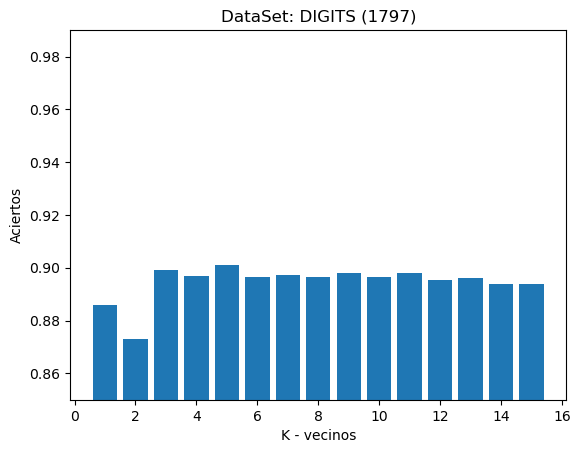

In [14]:
fig, ax =plt.subplots()
ax.bar(x=np.arange(1, 16), height=aciertos)
ax.set_title('DataSet: DIGITS (1797)')
ax.set_ylim(0.85,0.99)
ax.set_xlabel('K - vecinos')
ax.set_ylabel('Aciertos')

In [15]:
print('Kmax = ',np.argmax(aciertos)+1, '\tTasa max = ', np.max(aciertos))

Kmax =  5 	Tasa max =  0.9010016694490819


In [16]:
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo